<a href="https://colab.research.google.com/github/jhportfolio1/MsAiSchool07_DeepLearning/blob/main/DL06_Keras(%EB%89%B4%EC%8A%A4%EA%B8%B0%EC%82%AC%EB%B6%84%EB%A5%98).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 뉴스 기사 분류 : 로이터 데이터셋

>## 1) 로이터 데이터셋

>>### (1) 특징
- 46개의 상호 배타적인 토픽
- 1986년 데이터
- Training Data 8982개 / Test Data 2246개
- 전처리 되어 있어서 단어들이 모두 숫자로 변한되어 있음

>>### (2) 필요한 작업
- N개의 클래스로 데이터 포인트 분류 : 네트워크 마지막 Dense층 크기가 N
- 단일 레이블/다중분류 : softmax 활성화 함수 사용 
- 범주형 크로스엔트로피 사용 : 모델의 확률분포와 타깃분포 사이 거리 최소화
- 범주형인코딩(원-핫인코딩) + Categorical_crossentropy 손실함수
- 정수인코딩 + sparse_categorical_crossentropy 손실함수 
- 많은 수의 범주 분류시에 중간층 크기 너무 작지 않게해야함

---

# 2. 실습

>## 1) 데이터 가져오기

In [1]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2110848/2110848 [==============================] - 0s 0us/step


>## 2) 데이터 확인

In [2]:
train_data.shape[0] 

8982

In [3]:
print(train_data.shape)
print(test_data.shape)

(8982,)
(2246,)


>## 3) 훈련데이터와 테스트 데이터의 벡터 변환

In [4]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))

  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  
  return results

In [5]:
# 훈련데이터와 테스트 데이터의 벡터 변환

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

>## 4) 라벨데이터를 카테고리 데이터로 전환 

In [6]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

>## 5) 신경망(모델) 구성

In [8]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))

#토픽 수만큼 출력 (여러개중에 뽑아야하니 Softmax)
model.add(layers.Dense(46, activation='softmax'))

>## 7) 모델 가중치 부여

In [9]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

>## 8) 학습용/훈련용 데이터 외 검증용 데이터 만들기(Validation Data)

In [14]:
x_val = x_train[:1000] #1000번까지 검증용데이터 
partial_x_train = x_train[1000:] #1000번이후 학습용데이터

#위에서 라벨데이터 이름 바꿔놔서 그대로 따름
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

>## 9) 학습 및 기록

In [15]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 4s 176ms/step - loss: 2.5945 - accuracy: 0.5101 - val_loss: 1.7418 - val_accuracy: 0.6220
Epoch 2/20
16/16 [==============================] - 1s 70ms/step - loss: 1.4773 - accuracy: 0.6882 - val_loss: 1.3365 - val_accuracy: 0.6980
Epoch 3/20
16/16 [==============================] - 1s 64ms/step - loss: 1.1362 - accuracy: 0.7534 - val_loss: 1.1665 - val_accuracy: 0.7380
Epoch 4/20
16/16 [==============================] - 1s 65ms/step - loss: 0.9265 - accuracy: 0.8008 - val_loss: 1.0600 - val_accuracy: 0.7650
Epoch 5/20
16/16 [==============================] - 1s 64ms/step - loss: 0.7647 - accuracy: 0.8344 - val_loss: 1.0037 - val_accuracy: 0.7870
Epoch 6/20
16/16 [==============================] - 1s 63ms/step - loss: 0.6382 - accuracy: 0.8614 - val_loss: 0.9497 - val_accuracy: 0.7950
Epoch 7/20
16/16 [==============================] - 1s 66ms/step - loss: 0.5304 - accuracy: 0.8859 - val_loss: 0.9209 - val_accuracy: 0.8060
Epoch 8/20
1

>## 10) 차트 그리기

- Loss-Epochs 에서는 Validation loss가 가장 낮은 값
- Acc-Epochs 에서는 Training loss와 Validation loss가 가장 가까운 값

In [19]:
import matplotlib.pyplot as plt

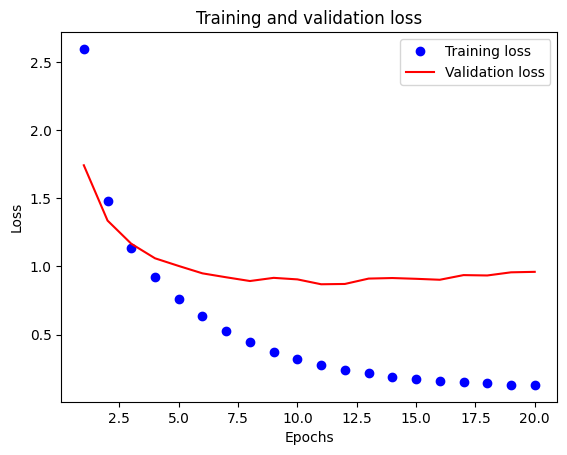

In [21]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

#반복횟수 구하기
epochs = range(1, len(loss)+1)

#차트그리기(반복횟수에 따른 손실값)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r-', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

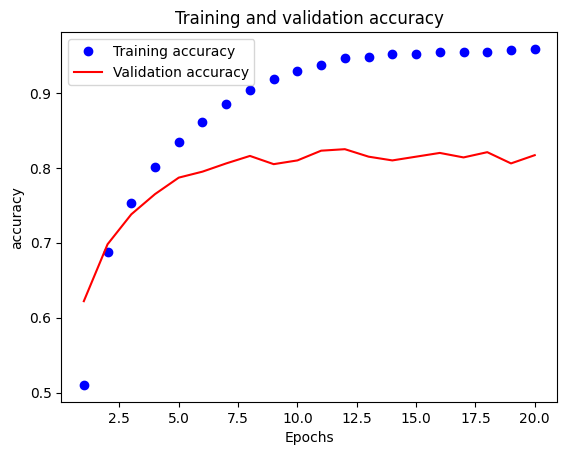

In [22]:
#차트그리기(반복횟수에 따른 정확도값)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'r-', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()

>## 11) 검증된 결과로 다시 학습

- 첫번째 로스값은 클 수 밖에 없음
- 결과 79% 모델 만들어짐

In [23]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(partial_x_train,  #학습용데이터
                    partial_y_train,   #학습용데이터
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val)) #검증용데이터

#평가
eval_result = model.evaluate(x_test, one_hot_test_labels) #테스트용데이터
print(eval_result)

Epoch 1/20
16/16 [==============================] - 3s 84ms/step - loss: 2.7681 - accuracy: 0.4592 - val_loss: 1.8654 - val_accuracy: 0.6290
Epoch 2/20
16/16 [==============================] - 1s 59ms/step - loss: 1.5628 - accuracy: 0.6869 - val_loss: 1.4030 - val_accuracy: 0.6900
Epoch 3/20
16/16 [==============================] - 1s 57ms/step - loss: 1.1999 - accuracy: 0.7430 - val_loss: 1.2091 - val_accuracy: 0.7420
Epoch 4/20
16/16 [==============================] - 1s 56ms/step - loss: 0.9757 - accuracy: 0.7892 - val_loss: 1.0891 - val_accuracy: 0.7660
Epoch 5/20
16/16 [==============================] - 1s 54ms/step - loss: 0.8109 - accuracy: 0.8266 - val_loss: 1.0174 - val_accuracy: 0.7820
Epoch 6/20
16/16 [==============================] - 1s 53ms/step - loss: 0.6721 - accuracy: 0.8569 - val_loss: 0.9734 - val_accuracy: 0.7890
Epoch 7/20
16/16 [==============================] - 1s 92ms/step - loss: 0.5618 - accuracy: 0.8826 - val_loss: 0.9125 - val_accuracy: 0.8120
Epoch 8/20
16